In [45]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [8]:
img = cv2.imread('./dataset/maria_sharapova/1368843.jpg')
img.shape


(1000, 1600, 3)

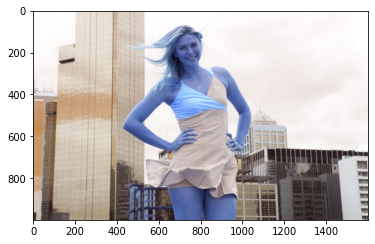

In [9]:
plt.imshow(img)


In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
gray


array([[255, 254, 255, ..., 253, 253, 253],
       [255, 255, 254, ..., 254, 254, 254],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 56,  55,  56, ..., 100, 100, 106],
       [ 72,  72,  71, ...,  84,  86,  91],
       [112, 112, 111, ...,  80,  83,  88]], dtype=uint8)

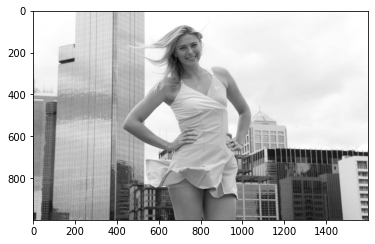

In [11]:
plt.imshow(gray, cmap='gray')


In [12]:
face_cascade = cv2.CascadeClassifier(
    './opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    './opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.2, 5)
faces


array([[676, 122, 138, 138]], dtype=int32)

In [13]:
(x, y, w, h) = faces[0]
x, y, w, h


(676, 122, 138, 138)

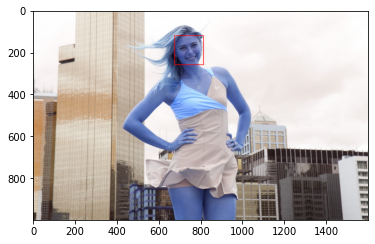

In [14]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)


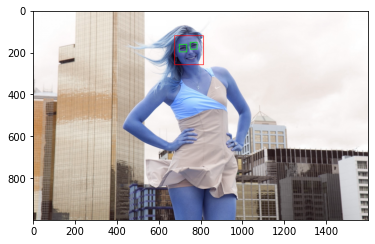

In [15]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


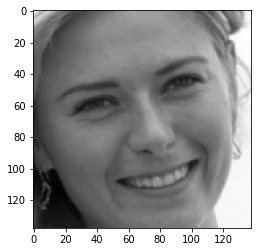

In [16]:
plt.imshow(roi_gray, cmap='gray')


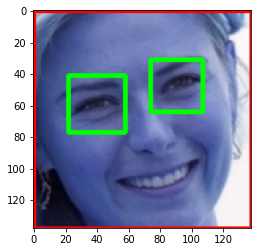

In [17]:
plt.imshow(roi_color, cmap='gray')


array([[ 52,  14,  37,  37],
       [138,  42,  59,  59]], dtype=int32)

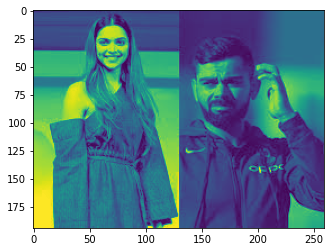

In [18]:
img = cv2.imread('./dataset/virat_kohli/05b9bac90a.jpg')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
plt.imshow(gray)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


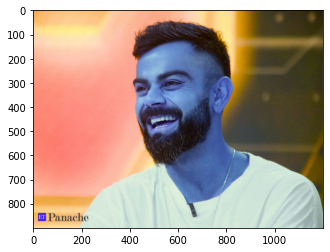

In [20]:
original_image = cv2.imread('./dataset/virat_kohli/0b43460429.jpg')
plt.imshow(original_image)


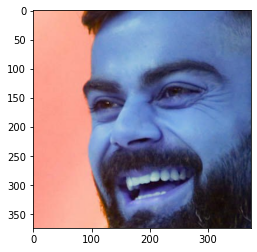

In [21]:
cropped_image = get_cropped_image_if_2_eyes(
    './dataset/virat_kohli/0b43460429.jpg')
plt.imshow(cropped_image)


In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc


Wavelet transform

In [5]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

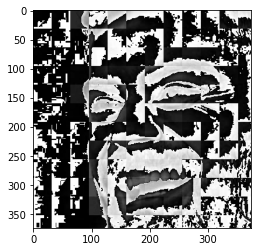

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [51]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [39]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [40]:
img_dirs

['./dataset/serena_williams',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/virat_kohli',
 './dataset/lionel_messi']

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data) 
os.mkdir(path_to_cr_data)


In [45]:
cropped_image_dirs = []
celb_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celb_name = img_dir.split('/')[-1]
    print(celb_name)
    celb_file_name_dict[celb_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                
                cropped_image_dirs.append(cropped_folder)
                print('generating cropped image', cropped_folder)

            cropped_file_name = celb_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celb_file_name_dict[celb_name].append(cropped_file_path)
            count += 1


serena_williams
generating cropped image ./dataset/new_cropped/serena_williams
maria_sharapova
generating cropped image ./dataset/new_cropped/maria_sharapova
roger_federer
generating cropped image ./dataset/new_cropped/roger_federer
virat_kohli
generating cropped image ./dataset/new_cropped/virat_kohli
lionel_messi
generating cropped image ./dataset/new_cropped/lionel_messi


In [46]:
cropped_image_dirs

['./dataset/new_cropped/serena_williams',
 './dataset/new_cropped/maria_sharapova',
 './dataset/new_cropped/roger_federer',
 './dataset/new_cropped/virat_kohli',
 './dataset/new_cropped/lionel_messi']

In [1]:
new_cropped_image_dirs = ['./dataset/cropped/serena_williams', './dataset/cropped/maria_sharapova',
                          './dataset/cropped/roger_federer', './dataset/cropped/virat_kohli', './dataset/cropped/lionel_messi']


In [2]:
celb_file_name_dict = {}
for img_dir in new_cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celb_file_name_dict[celebrity_name] = file_list
celb_file_name_dict


{'serena_williams': ['./dataset/cropped/serena_williams/serena_williams12.png',
  './dataset/cropped/serena_williams/serena_williams35.png',
  './dataset/cropped/serena_williams/serena_williams5.png',
  './dataset/cropped/serena_williams/serena_williams18.png',
  './dataset/cropped/serena_williams/serena_williams11.png',
  './dataset/cropped/serena_williams/serena_williams20.png',
  './dataset/cropped/serena_williams/serena_williams26.png',
  './dataset/cropped/serena_williams/serena_williams23.png',
  './dataset/cropped/serena_williams/serena_williams30.png',
  './dataset/cropped/serena_williams/serena_williams29.png',
  './dataset/cropped/serena_williams/serena_williams34.png',
  './dataset/cropped/serena_williams/serena_williams15.png',
  './dataset/cropped/serena_williams/serena_williams1.png',
  './dataset/cropped/serena_williams/serena_williams3.png',
  './dataset/cropped/serena_williams/serena_williams14.png',
  './dataset/cropped/serena_williams/serena_williams16.png',
  './dat

In [3]:
class_dict = {}
count = 0
for celebrity_name in celb_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'serena_williams': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed image to train our classifier. Let's prepare X and y now

In [6]:
X, y = [], []
for celebrity_name, training_files in celb_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(
            32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [7]:
len(X[0])

4096

In [57]:
32*32*3 + 32*32

4096

In [8]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(167, 4096)

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()),
                ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.7857142857142857

In [20]:
len(X_test)

42

In [21]:
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.70      0.78      0.74         9
           2       0.67      0.67      0.67         6
           3       0.92      0.92      0.92        12
           4       1.00      0.60      0.75        10

    accuracy                           0.79        42
   macro avg       0.78      0.79      0.77        42
weighted avg       0.82      0.79      0.79        42



In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
model_params = {
    "svm": {
        "model": SVC(gamma='auto', probability=True),
        "params": {
            "svc__C": [1, 10, 100, 1000],
            "svc__kernel": ['rbf', 'linear']
        }
    },
    # "random_forest": {
    #     "model": RandomForestClassifier(),
    #     "params": {
    #         "randomForestclassifier__n_estimators": [1, 5, 10]
    #     }
    # },
    "logistic_regression": {
        "model": LogisticRegression(solver='liblinear', multi_class='auto'),
        "params": {
            "logisticregression__C": [1, 5, 10]
        }
    }
}


In [39]:
import pandas as pd
scores = []
best_estimators = {}
for key, value in model_params.items():
    pipe = make_pipeline(StandardScaler(), value['model'])
    # pipe = Pipeline([('scaler', StandardScaler()),
    #                  (key, value['model'])])
    clf = GridSearchCV(pipe, value['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        "model": key,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
    best_estimators[key] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,svm,0.824,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,logistic_regression,0.872,{'logisticregression__C': 1}


In [43]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.9047619047619048

In [42]:
best_estimators['svm'].score(X_test, y_test)

0.7857142857142857

In [47]:
best_clf = best_estimators['logistic_regression']

In [50]:
from sklearn.metrics import confusion_matrix

y_preds = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm

array([[ 5,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 2,  0,  4,  0,  0],
       [ 0,  1,  0, 11,  0],
       [ 0,  1,  0,  0,  9]])

Text(69.0, 0.5, 'Truth')

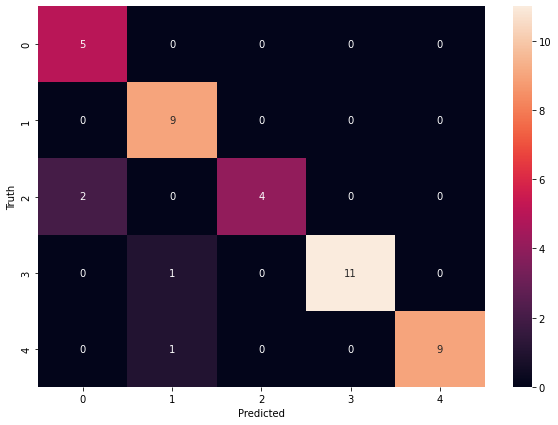

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
class_dict

{'serena_williams': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

In [53]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [54]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))
